<a href="https://colab.research.google.com/github/NourBerakdar/Diamond-Price-Prediction/blob/main/diamond_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Look at the big picture
* The dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price

* The 10 attributes are (price , carat , cut , color ,clarity , x , y , z , depth ,table)

* In this project i built a model that can able to predict the price of any diamond in this dataset

* The problem is Regression (price prediction) ~ continuous value

* I made in this project :
read, visualize data, drop outliers by using IQR, data scaling and ordinal encoder , model training by using [linear regression, decision tree, random forest]
and fine tuning model

# Download Data From Kaggle
https://www.kaggle.com/competitions/shai-club

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c shai-club

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/865k [00:00<?, ?B/s]
100% 865k/865k [00:00<00:00, 73.6MB/s]
Archive:  shai-club.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

diamond_train=pd.read_csv("/content/train.csv")
diamond_test=pd.read_csv("/content/test.csv")
diamond_train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
diamond_train.shape

(43152, 11)

In [ ]:
diamond_test.shape

(10788, 10)

In [ ]:
# To show are null elements exist in data? 
diamond_train=diamond_train.drop(["Id"],axis=1)

#color, cut, clarity are objects not numerical

## Discover and visualize the data

In [ ]:
diamond_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
print(diamond_train['cut'].value_counts(),'\n', diamond_train['color'].value_counts(),'\n', diamond_train['clarity'].value_counts())

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64 
 G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64 
 SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64


# Data visualization

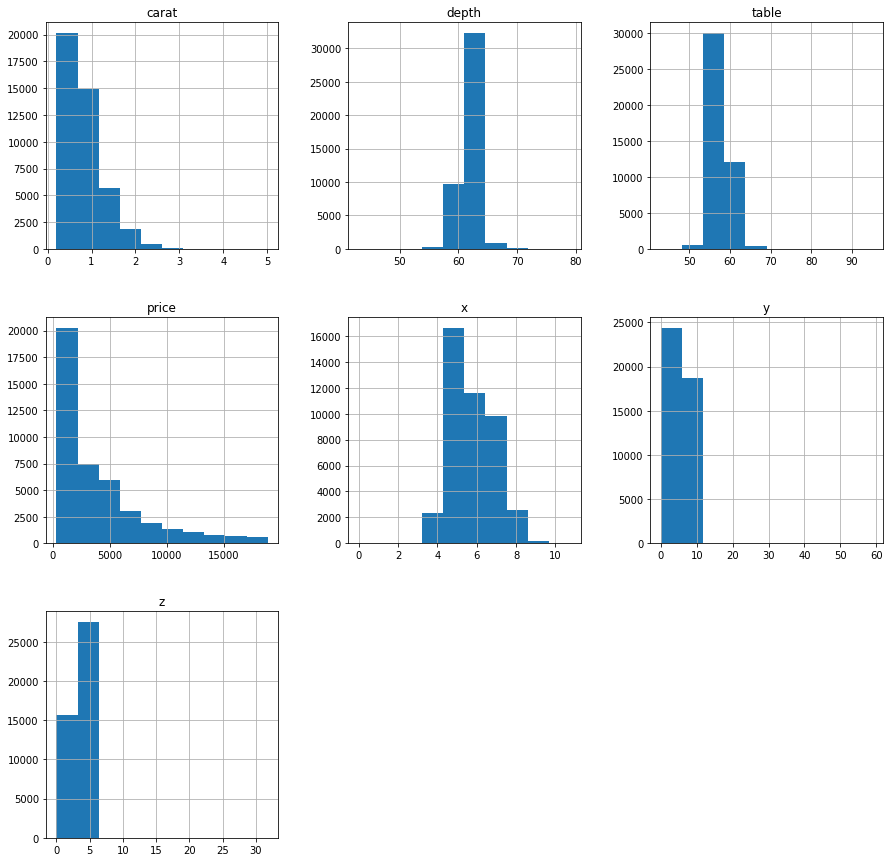

In [ ]:
diamond_train.hist(figsize=(15, 15))
plt.show()

# Preparing data for machine learning

In [ ]:
# To show summary about numerical attributes
diamond_train.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Note:
**we notice that min value of "x", "y", "z" are zero so that there are faulty values
in this data ,so you need to filter out those as it clearly faulty data points**



In [ ]:
# Dropping dimentionless diamonds from train data

diamond_train=diamond_train.drop(diamond_train[diamond_train["x"]==0].index)
diamond_train=diamond_train.drop(diamond_train[diamond_train["y"]==0].index)
diamond_train=diamond_train.drop(diamond_train[diamond_train["z"]==0].index)
diamond_train.shape

(43135, 10)

**We lost 17 data points by deleting the dimensionless(2-D or 1-D) diamonds from train data**

**A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.**

# delete duplicate in data

In [ ]:
#Checking for duplicate data or rows 
dups = diamond_train .duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Before',diamond_train.shape)
diamond_train.drop_duplicates(inplace=True) 
print('After',diamond_train.shape)

Number of duplicate rows = 97
Before (43135, 10)
After (43038, 10)


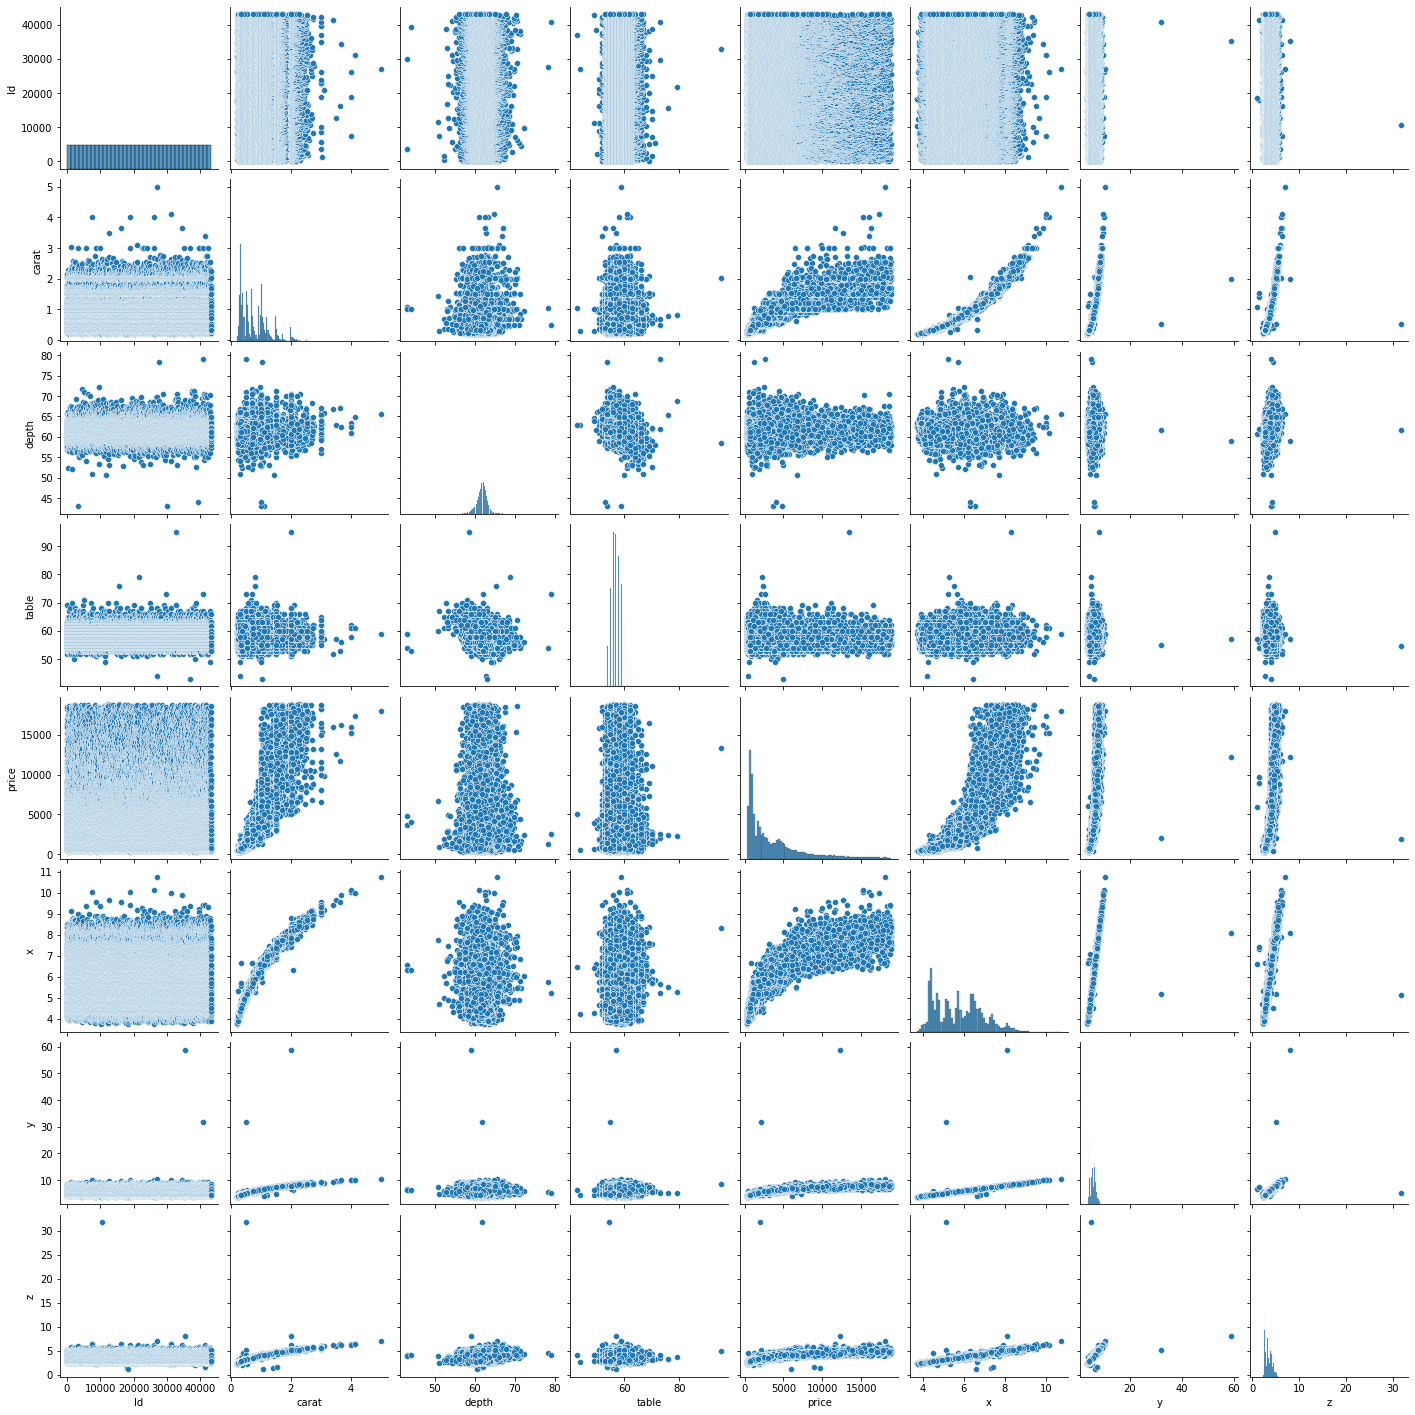

In [ ]:
sns.pairplot(diamond_train)
plt.show()

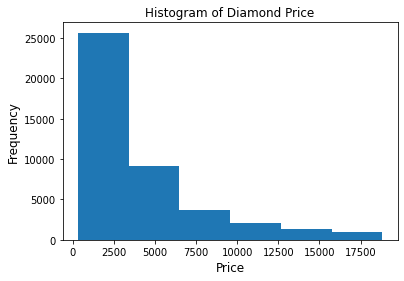

In [ ]:
 #specify the bins (bar) for histogram

plt.hist(diamond_train['price'], bins=6)

#define labels and title

plt.title('Histogram of Diamond Price')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

# heatmap correlation

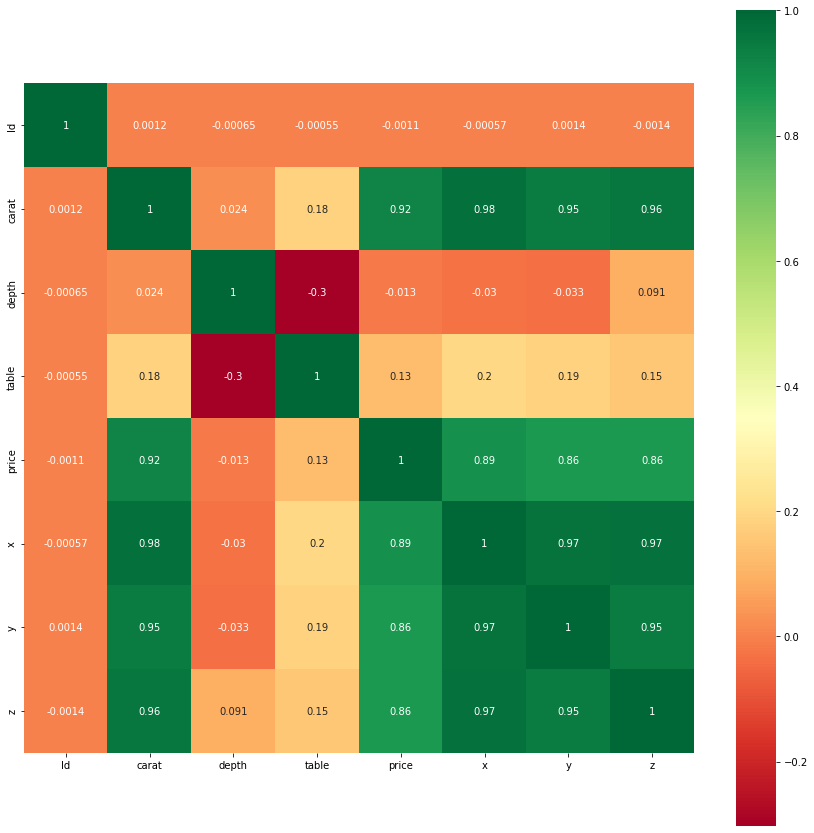

In [ ]:
plt.figure(figsize=(15,15))  # on this line I just set the size of figure to 15 by 15.
p=sns.heatmap(diamond_train.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [ ]:
#feature engineering
diamond_train['space'] = diamond_train['x'] * diamond_train['y']
diamond_train['volume'] = diamond_train['x'] * diamond_train['y'] * diamond_train['z']

diamond_train.drop(['x','y','z'], axis = 1)
diamond_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,space,volume
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,43.3620,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,54.7596,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,19.5363,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,27.0918,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,32.9472,115.315200


In [ ]:
#How each feature affects the price of diamonds
correlations = diamond_train.corr()
correlations["price"].sort_values(ascending=False)

price     1.000000
carat     0.921864
space     0.900020
volume    0.899709
x         0.887122
z         0.864745
y         0.862800
table     0.128029
depth    -0.013395
Name: price, dtype: float64



## removing outliers

In [ ]:
Q1=diamond_train.price.quantile(0.25)
Q3=diamond_train.price.quantile(0.75)
IQR=Q3-Q1

# detecting outliers
lower_IQR = Q1-1.5*IQR
upper_IQR = Q3 + 1.5*IQR

# removing outliers
for col in  diamond_train.select_dtypes(exclude='object').columns:
    diamond_train = diamond_train[(diamond_train[col]>lower_IQR)&(diamond_train[col]<upper_IQR)]


diamond_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,space,volume
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,43.3620,176.483340
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,19.5363,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,27.0918,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,32.9472,115.315200
5,0.90,Very Good,G,IF,63.1,58.0,5670,6.18,6.09,3.87,37.6362,145.652094


In [ ]:
#How each feature affects the price of diamonds
correlations = diamond_train.corr()
correlations["price"].sort_values(ascending=False)

price     1.000000
carat     0.919538
volume    0.917569
space     0.915075
x         0.904230
y         0.897026
z         0.873095
table     0.136815
depth     0.011435
Name: price, dtype: float64

# OrdinalEncoder

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder
#store object colunms
categorical_feats = diamond_train.dtypes[diamond_train.dtypes == 'object'].index

#make ordinalEncoder in this categories

encoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                              ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                                              ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

diamond_train[categorical_feats] = encoder.fit_transform(diamond_train[categorical_feats])


diamond_train[categorical_feats].head()



,cut,color,clarity
0,4.0,1.0,1.0
2,4.0,4.0,3.0
3,4.0,3.0,3.0
4,3.0,2.0,5.0
5,2.0,3.0,7.0


In [ ]:
# Make copy to avoid changing original data 
df = diamond_train.copy()
df_test= diamond_test.copy()

# scaling

In [ ]:
scale = StandardScaler()
data_scale = scale.fit_transform(df[['carat','depth','table','space','volume']])
scaling =  pd.DataFrame(data_scale,columns=['carat','depth','table','space','volume'],index=df.index)
scaling.head()

,carat,depth,table,space,volume
0,0.995282,0.029459,-0.186412,1.091751,1.068484
2,-1.054943,-0.319801,-0.635183,-1.108639,-1.048838
3,-0.473123,-0.389653,-0.635183,-0.410861,-0.475041
4,-0.002125,-0.529358,-0.186412,0.129907,0.020138
5,0.551990,0.937538,0.262359,0.562953,0.540075


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39088 entries, 0 to 43151
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    39088 non-null  float64
 1   cut      39088 non-null  float64
 2   color    39088 non-null  float64
 3   clarity  39088 non-null  float64
 4   depth    39088 non-null  float64
 5   table    39088 non-null  float64
 6   price    39088 non-null  int64  
 7   x        39088 non-null  float64
 8   y        39088 non-null  float64
 9   z        39088 non-null  float64
 10  space    39088 non-null  float64
 11  volume   39088 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


## Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

**make display function to show the resultant scores and calculate its Mean and Standard deviation for each model**

In [ ]:
def display(scores):
  print("scores",scores)
  print("Mean",scores.mean())
  print("Standard deviation",scores.std())

split data train in to train and test

In [ ]:
#split diamond data into data & labels
from sklearn.model_selection import train_test_split
train_diamonds ,test_diamond = train_test_split(df,test_size = 0.2,random_state = 42 )

Split diamond data into data & labels



In [ ]:
train_diamonds = diamond_train.drop(['price'],axis=1)
train_labels = diamond_train['price']

In [ ]:
test_diamonds = test_diamond.drop(['price'],axis=1)
test_labels = test_diamond['price']

# Linear Regression model

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(train_diamonds,train_labels)
labels_predict = lin_reg.predict(train_diamonds)
lin_mse = mean_squared_error(train_labels,labels_predict)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

734.7949418982734


**Evaluation Using Cross-Validation**

In [ ]:
lin_scores=cross_val_score(lin_reg,train_diamonds,train_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_score=np.sqrt(-lin_scores)
display(lin_rmse_score)

scores [ 723.6061864   717.15330397 1641.49168574  718.9092668   752.34772562
  757.63555211  771.43291632  719.25512702  738.53951634  768.61183721]
Mean 830.8983117533762
Standard deviation 270.92441816485916


# Random forest model

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(train_diamonds,train_labels)
labels_predict = random_forest.predict(train_diamonds)
forest_mse = mean_squared_error(train_labels,labels_predict)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

126.36894255413084


**Evaluation Using Cross-Validation**

In [ ]:
random_scores=cross_val_score(random_forest,train_diamonds,train_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_score=np.sqrt(-random_scores)
display(lin_rmse_score)

scores [347.62475589 323.47297478 337.75967209 339.37481038 347.75239887
 351.6954189  349.91600377 324.1011761  330.85045316 359.07845405]
Mean 341.1626117988856
Standard deviation 11.484148180705064


# DecisionTree Regressor model

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_diamonds,train_labels)
labels_predict = tree_reg.predict(train_diamonds)
tree_mse = mean_squared_error(train_labels,labels_predict)
tree_rmse = np.sqrt(forest_mse)
print(forest_rmse)

126.36894255413084


**Evaluation Using Cross-Validation**

In [ ]:
scores=cross_val_score(tree_reg,train_diamonds,train_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_score=np.sqrt(-scores)
display(tree_rmse_score)

scores [465.54444068 459.21383722 477.82217242 450.3099151  475.62279384
 476.92722897 486.12134902 450.9199331  456.1675392  474.51188989]
Mean 467.31610994566034
Standard deviation 11.951107747426798


# Fine Tuning The model

will fine tune for Random forest model beacuse there have best RMSE

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[8,10,15,20]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[3,10]}
]
forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg,param_grid,cv = 5, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(train_diamonds, train_labels)

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score), params)

397.621316761809 {'max_features': 8, 'n_estimators': 3}
357.2788673532231 {'max_features': 8, 'n_estimators': 10}
345.3398349687653 {'max_features': 8, 'n_estimators': 30}
394.72011861358 {'max_features': 10, 'n_estimators': 3}
355.6968376705696 {'max_features': 10, 'n_estimators': 10}
345.4325302559248 {'max_features': 10, 'n_estimators': 30}
nan {'max_features': 15, 'n_estimators': 3}
nan {'max_features': 15, 'n_estimators': 10}
nan {'max_features': 15, 'n_estimators': 30}
nan {'max_features': 20, 'n_estimators': 3}
nan {'max_features': 20, 'n_estimators': 10}
nan {'max_features': 20, 'n_estimators': 30}
469.02488175674836 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
402.09800807987665 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
429.3740430274079 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
374.8535328223887 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
405.4918554835725 {'bootstrap': False, 'max_features': 4, 'n_estimators': 

In [ ]:
final_model =  grid_search.best_estimator_

# Evaluating on test set

In [ ]:
final_predictions = final_model.predict(test_diamonds)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse 

131.24048666283161

# Finish